# OpenCV Overview
This notebook covers the fundamentals of computer vision to manipulate images with OpenCV and understand how it works.

Through this live article, I intend to show following tasks:

- OpenCV Library
- Loading an image
- Show image
- Manipulating an image
- Basic Edge detection
- Face detection with OpenCV haar cascades.


In [1]:
# OpenCV Library Install for Python
!python3 -m pip install opencv-python

# other required libraries
!python3 -m pip install matplotlib imutils psutil

  Using cached https://files.pythonhosted.org/packages/8e/ad/b33f9389626709f20c69e6152b886c27e41da16b5c34470481cf609d5a06/opencv_python-3.4.1.15-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/43/17/cd9fa14492dbef2aaf22622db79dba087c10f125473e730cda2f2019c40b/numpy-1.14.5-cp35-cp35m-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 12.6MB 152kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/43/17/cd9fa14492dbef2aaf22622db79dba087c10f125473e730cda2f2019c40b/numpy-1.14.5-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cf/f5/af2b09c957ace60dcfac112b669c45c8c97e32f94aa8b56da4c6d1682825/python_dateutil-2.7.3-py2.py3-none-any.whl
    100% |████████████████████████████████| 952kB 641kB/s ta 0:00:01    74% |███████████████████████▉    

In [2]:
# Loading OpenCV Library
import cv2 as cv
import numpy as np

print('OpenCV Version:', cv.__version__)
print('Numpy Version:', np.__version__)

OpenCV Version: 3.4.1
Numpy Version: 1.14.5


In [3]:
# Loading an Image
img = cv.imread('resources/intel-logo.png', cv.IMREAD_COLOR)
# In the case of color images, the decoded images will have the channels stored in **B G R** order.

if img is None:
    print('Unable to read this image into memory. Check the OpenCV docs for more information\nhttp://docs.opencv.org/2.4/doc/tutorials/introduction/display_image/display_image.html')
else:
    print('Image successfully loaded!')

Image successfully loaded!


In [4]:
# Image Properties
# In our case the img is 328 pixels tall, 600 pixels wide and it contains 3 channels (red, green and blue).
print("Shape of the Image:", img.shape)

# Each pixel is three 8-bit integers describing the red, green and blue values at a particular point
print("Each pixel is three", img.dtype, " values that describe the red, green and blue channel at a particular point.")

Shape of the Image: (500, 1000, 3)
Each pixel is three uint8  values that describe the red, green and blue channel at a particular point.


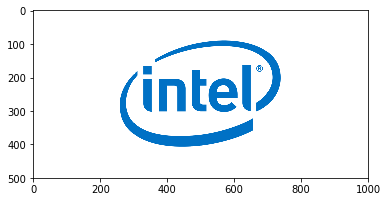

In [5]:
# Display Image
# matplotlib helps to draw image matrix to IPython Notebook
# Display the results of Matplotlib in this notebook
%matplotlib inline

# Matplotlib is a Python 2D plotting library which
# produces publication quality figures
import matplotlib.pyplot as plt

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
#cvtColor method used to change colorspace, 

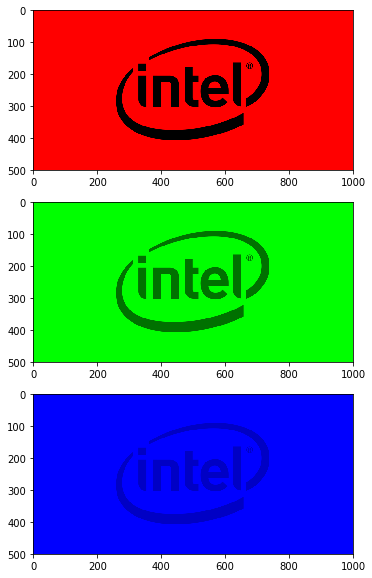

In [6]:
# Colorspace
copy1 = cv.imread('resources/intel-logo.png', cv.IMREAD_COLOR)
copy2 = cv.imread('resources/intel-logo.png', cv.IMREAD_COLOR)
copy3 = cv.imread('resources/intel-logo.png', cv.IMREAD_COLOR)

# 2nd index is for RED
# 1st index is for GREEN
# 0th index is for is


# Let's see Red, Green and Blue scale of Image
plt.figure(figsize=(10, 10));
plt.subplot(3, 1, 1)

copy1[:,:,0] = 0
copy1[:,:,1] = 0
plt.imshow(cv.cvtColor(copy1, cv.COLOR_BGR2RGB))

plt.subplot(3, 1, 2)

copy2[:,:,0] = 0
copy2[:,:,2] = 0
plt.imshow(cv.cvtColor(copy2, cv.COLOR_BGR2RGB))

plt.subplot(3, 1, 3)

copy3[:,:,1] = 0
copy3[:,:,2] = 0
plt.imshow(cv.cvtColor(copy3, cv.COLOR_BGR2RGB))

Height of Image 500
Weight of Image 1000


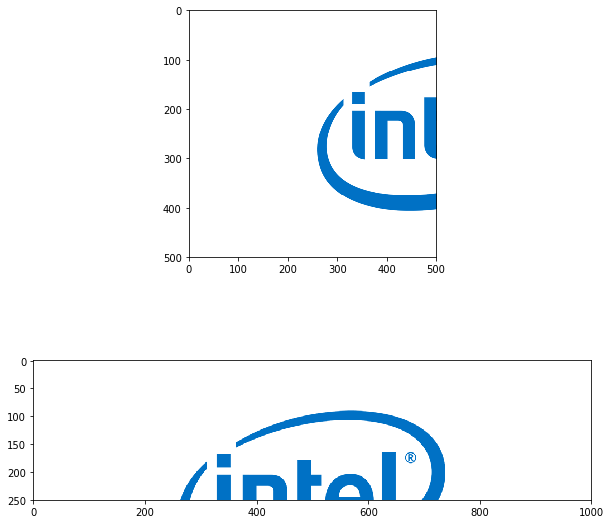

In [7]:
# Cut image in half
y = img.shape[0]
print('Height of Image {}'.format(y))

x = img.shape[1]
print('Weight of Image {}'.format(x))

plt.figure(figsize=(10, 10));
plt.subplot(2, 1, 1)

# cut half from X 
img2 = img[:,0:int(x/2)]
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

plt.subplot(2, 1, 2)
# cut half from Y
img3 = img[0:int(y/2),:]
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

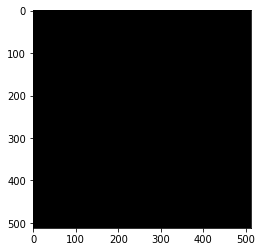

In [8]:
# Drawing images with CV
# As mentioned, image represented as matrices and can be created manually.
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

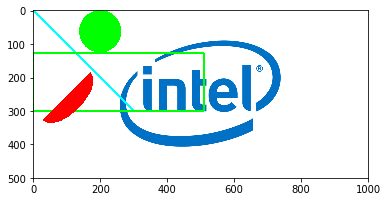

In [9]:
#OpenCV library is a handy tool you can use in lots of different ways

# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv.line(img, (0,0), (300,300), (255,255,0), 5)
# => Diagonal yellow line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv.rectangle(img, (0,300), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv.circle(img, (200,63), 63, (0,255,0), -1)
# => Green filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv.ellipse(img, (100,256), (100,50), -45, 0, 180, (0,0,255), -1)
# => Blue wide down-half ellipse

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Face Detection

Open CV Library has methods to analyze images with previously trained models called haar cascades to detect objects or faces. 

https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html

"Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images."

Cascade files are trained before using for face detection. They stored as .xml files, which defines features to look at images for finding faces. It include classifiers.

Cascade file training can be done with OpenCV as well, here is a guide for you:

https://docs.opencv.org/3.4.1/dc/d88/tutorial_traincascade.html



Found 5 faces!


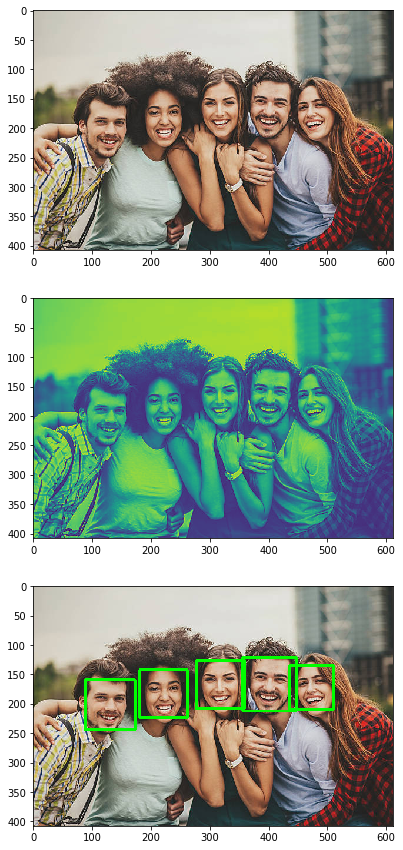

In [10]:
# Face Detection with OpenCV Haar Cascades

# determine cascade file
# XML File has the information about classifiers.
cascPath = 'haar_files/haarcascade_frontalface_default.xml'

# Read the image and show before running face detection
img = cv.imread('resources/people.jpg')

#Let's see image
plt.figure(figsize=(15, 15));
plt.subplot(3, 1, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# read image
img = cv.imread('resources/people.jpg')
# convert to gray scale, where detection works on grayscale image not on RGB
# working on a single range of colors lowers the number of features so classification be made easier and faster. It is data normalisation.
# it also reduces the amount of false_positives and false_negative which might occur while looking for classification and changes on the images
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Let's draw
plt.subplot(3, 1, 2)
plt.imshow(gray)

# use faceCascade object to get face coordinates from gray scale image
fCascade = cv.CascadeClassifier(cascPath)
# fCascade, get's 
faces = fCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv.CASCADE_SCALE_IMAGE
)
# length of faces which includes x, y, width, height values for each detected face
print("Found %d faces!" % len(faces))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    # use rectangle method to draw rectangle
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)

plt.subplot(3, 1, 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))